In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats


In [ ]:
df=pd.read_csv('C:/Users/PC/Downloads/Data_Tiki_Cleaned.csv')

In [ ]:
df1 = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def convert_categorical_var(df):
  le = LabelEncoder()

  categorical_var = ['Store', 'Type', 'Author Name','Publisher',
       'Translators', 'Categories', 'Range Price']

  for col in categorical_var:
    df[col] = le.fit_transform(df[col])
  return df


df1 = convert_categorical_var(df1)
df1.head()

,Name,Link Product,Store,Type,Author Name,Short Description,Publisher,Translators,Categories,Width,...,Original Price,Discount,Discount Rate,Rating,Review Count,Quantity Sold,Number of page,Range Price,Publication Date,Publication Year
0,Kế Toán Vỉa Hè - Thực Hành Báo Cáo Tài Chính C...,https://tiki.vn/ke-toan-via-he-thuc-hanh-bao-c...,35,1,953,BIẾN KẾ TOÁN KHÔ KHAN TRỞ THÀNH TRÒ CHƠI CON T...,63,516,99,13.0,...,199000,30000,15,5.0,111,5990.0,268.0,3,2023-09-22 00:00:00,2023.0
1,Mùa hè không tên (Nguyễn Nhật Ánh) - Tặng kèm ...,https://tiki.vn/mua-he-khong-ten-nguyen-nhat-a...,141,0,631,“Mùa hè không tên” là truyện dài mới nhất của ...,118,553,120,13.0,...,130000,21000,16,4.8,141,1715.0,292.0,2,2023-09-22 00:00:00,2023.0
2,Không Diệt Không Sinh Đừng Sợ Hãi (TB5),https://tiki.vn/khong-diet-khong-sinh-dung-so-...,141,1,867,Nhiều người trong chúng ta tin rằng cuộc đời c...,164,553,101,14.0,...,110000,34000,31,5.0,1481,21867.0,224.0,1,2022-06-01 00:00:00,2022.0
3,Cây Cam Ngọt Của Tôi,https://tiki.vn/cay-cam-ngot-cua-toi-p74021317...,86,1,428,“Vị chua chát của cái nghèo hòa trộn với vị ng...,148,271,98,14.0,...,108000,32400,30,5.0,614,4435.0,244.0,1,2019-03-01 00:00:00,2019.0
4,Nghệ Thuật Tư Duy Chiến Lược,https://tiki.vn/nghe-thuat-tu-duy-chien-luoc-p...,86,1,73,Có phải những người chiến thắng các chương trì...,5,172,98,16.0,...,239000,64500,27,3.5,2,108.0,560.0,3,2019-03-01 00:00:00,2019.0


In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mae, mse, rmse, r2, rmsle, mape

In [ ]:
def print_score(eval):
    print(f"    MAE: {eval[0]:.2f}")
    print(f"    MSE: {eval[1]:.2f}")
    print(f"    RMSE: {eval[2]:.2f}")
    print(f"    R-squared: {eval[3]:.4f}")
    print(f"    RMSLE: {eval[4]:.2f}")
    print(f"    MAPE: {eval[5]:.2f}%")


# 1. Linear Regression

## 1.1. Selected Features

In [ ]:
X=df1[['Discount', 'Store', 'Rating', 'Original Price', 'Categories', 'Quantity Sold', 'Review Count', 'Author Name']]
y=df1['Discount Rate']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr_pred_train=lr.predict(x_train)
lr_pred=lr.predict(x_test)

In [ ]:
lr_eval = evaluate_model(y_test, lr_pred)
print("Linear Regression:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, lr_pred_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(lr_eval)

Linear Regression:

Đánh giá trên tập train:
    MAE: 5.49
    MSE: 60.32
    RMSE: 7.77
    R-squared: 0.5916
    RMSLE: 0.56
    MAPE: inf%

Đánh giá trên tập test:
    MAE: 4.88
    MSE: 46.84
    RMSE: 6.84
    R-squared: 0.6586
    RMSLE: 0.52
    MAPE: inf%


C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))


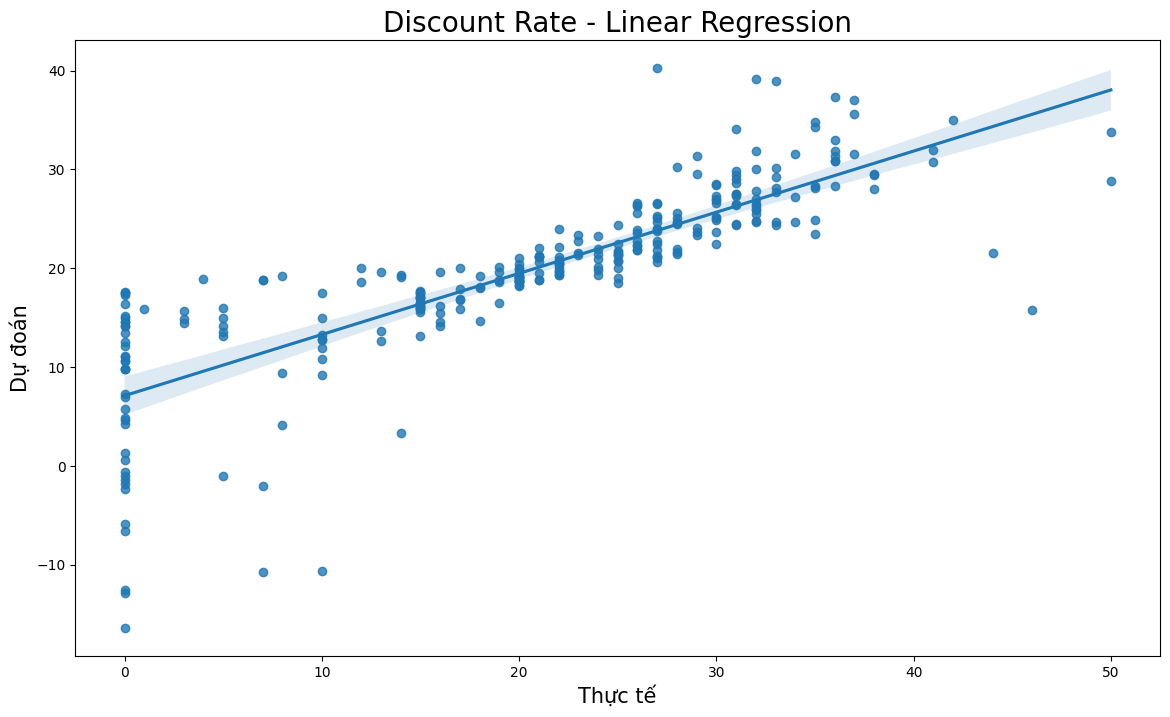

In [ ]:
out=pd.DataFrame({'Thực tế':y_test,'Dự đoán':lr_pred})
result=df1.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(14,8))
sns.regplot(x='Thực tế',y='Dự đoán',data=result)
plt.title('Discount Rate - Linear Regression',fontsize=20)
plt.xlabel('Thực tế',fontsize=15)
plt.ylabel('Dự đoán',fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({'Error values': (y_test - lr_pred)}).hvplot.kde()

:Distribution   [Error values]   (Density)

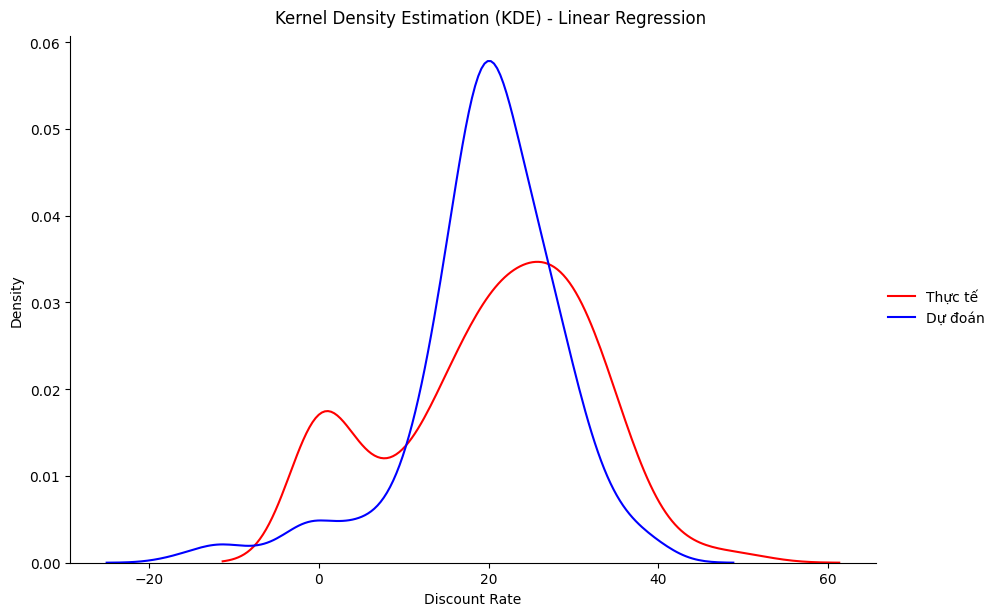

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Thực tế':y_test, 'Dự đoán': lr_pred}), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Thực tế', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Dự đoán', color='b', label='Dự đoán')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('Kernel Density Estimation (KDE) - Linear Regression', y=1.02)

g.add_legend()
plt.show()


## 1.2. All Features


In [ ]:
numeric_data = df1.select_dtypes(include=['number'])
numeric_data.columns

Index(['Store', 'Type', 'Author Name', 'Publisher', 'Translators',
       'Categories', 'Width', 'Length', 'Height', 'Product ID', 'Price',
       'Original Price', 'Discount', 'Discount Rate', 'Rating', 'Review Count',
       'Quantity Sold', 'Number of page', 'Range Price', 'Publication Year'],
      dtype='object')

In [ ]:
X=numeric_data.drop('Discount Rate',axis=1)
y=numeric_data['Discount Rate']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr_pred_train=lr.predict(x_train)
lr_pred=lr.predict(x_test)

In [ ]:
lr_eval = evaluate_model(y_test, lr_pred)
print("Linear Regression:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, lr_pred_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(lr_eval)

Linear Regression:

Đánh giá trên tập train:
    MAE: 5.47
    MSE: 59.69
    RMSE: 7.73
    R-squared: 0.5959
    RMSLE: 0.56
    MAPE: inf%

Đánh giá trên tập test:
    MAE: 4.86
    MSE: 46.73
    RMSE: 6.84
    R-squared: 0.6594
    RMSLE: 0.52
    MAPE: inf%


C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))


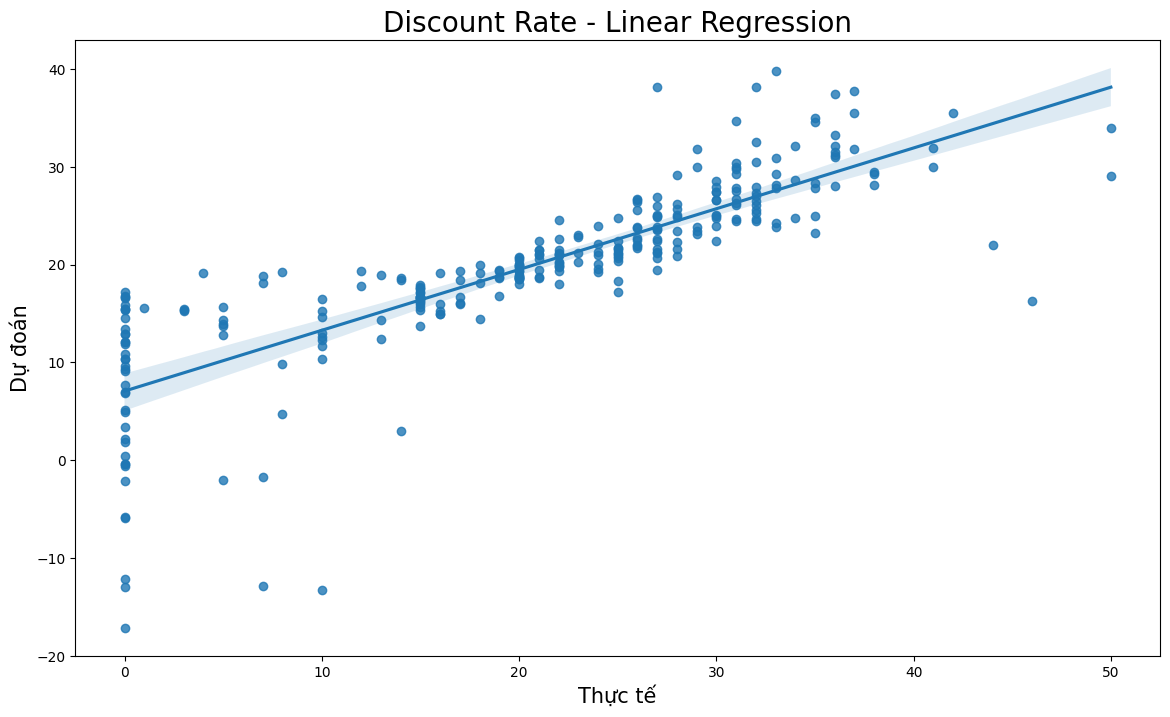

In [ ]:
out=pd.DataFrame({'Thực tế':y_test,'Dự đoán':lr_pred})
result=df1.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(14,8))
sns.regplot(x='Thực tế',y='Dự đoán',data=result)
plt.title('Discount Rate - Linear Regression',fontsize=20)
plt.xlabel('Thực tế',fontsize=15)
plt.ylabel('Dự đoán',fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({'Error values': (y_test - lr_pred)}).hvplot.kde()

:Distribution   [Error values]   (Density)

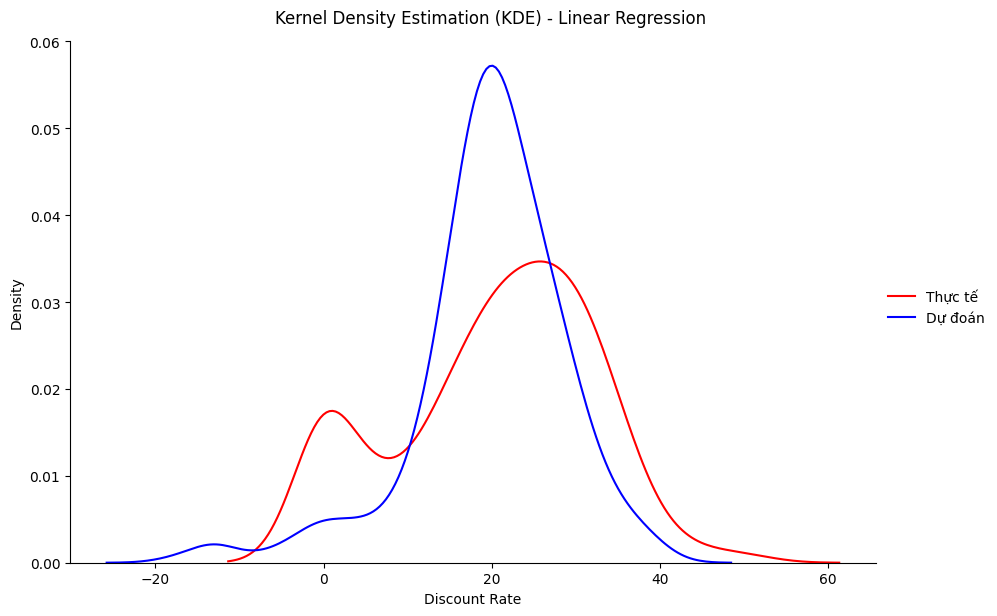

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Thực tế':y_test, 'Dự đoán': lr_pred}), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Thực tế', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Dự đoán', color='b', label='Dự đoán')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('Kernel Density Estimation (KDE) - Linear Regression', y=1.02)

g.add_legend()
plt.show()


# 2. Ridge Regression

In [ ]:
X=df1[['Discount', 'Store', 'Rating', 'Original Price', 'Categories', 'Quantity Sold', 'Review Count', 'Author Name']]
y=df1['Discount Rate']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
# Tìm alpha tối ưu
alphas = np.logspace(-6, 6, 13)
ridge = Ridge()

param_grid = {'alpha': alphas}

grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Hiển thị giá trị alpha tốt nhất và kết quả
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print('Hệ số alpha tối ưu: ',best_alpha)
print('Kết quả tốt nhất: ',best_score)


Hệ số alpha tối ưu:  1000.0
Kết quả tốt nhất:  -62.09990779784236


In [ ]:
rr_pred_train = grid_search.predict(x_train)
rr_pred = grid_search.predict(x_test)

In [ ]:
rr_eval = evaluate_model(y_test, rr_pred)
print("Ridge Regression:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, rr_pred_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(rr_eval)


Ridge Regression:

Đánh giá trên tập train:
    MAE: 5.49
    MSE: 60.34
    RMSE: 7.77
    R-squared: 0.5915
    RMSLE: 0.56
    MAPE: inf%

Đánh giá trên tập test:
    MAE: 4.89
    MSE: 47.01
    RMSE: 6.86
    R-squared: 0.6573
    RMSLE: 0.52
    MAPE: inf%


C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))


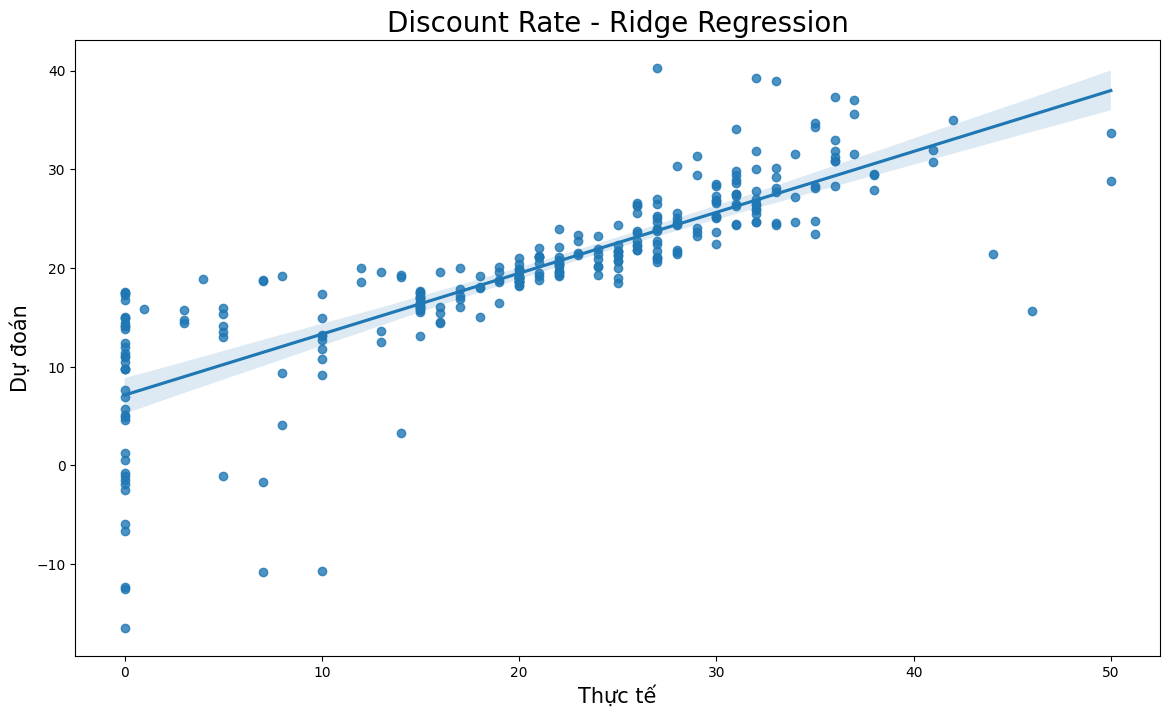

In [ ]:
out=pd.DataFrame({'Thực tế':y_test,'Dự đoán':rr_pred})
result=df1.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(14,8))
sns.regplot(x='Thực tế',y='Dự đoán',data=result)
plt.title('Discount Rate - Ridge Regression',fontsize=20)
plt.xlabel('Thực tế',fontsize=15)
plt.ylabel('Dự đoán',fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({'Error values': (y_test - rr_pred)}).hvplot.kde()

:Distribution   [Error values]   (Density)

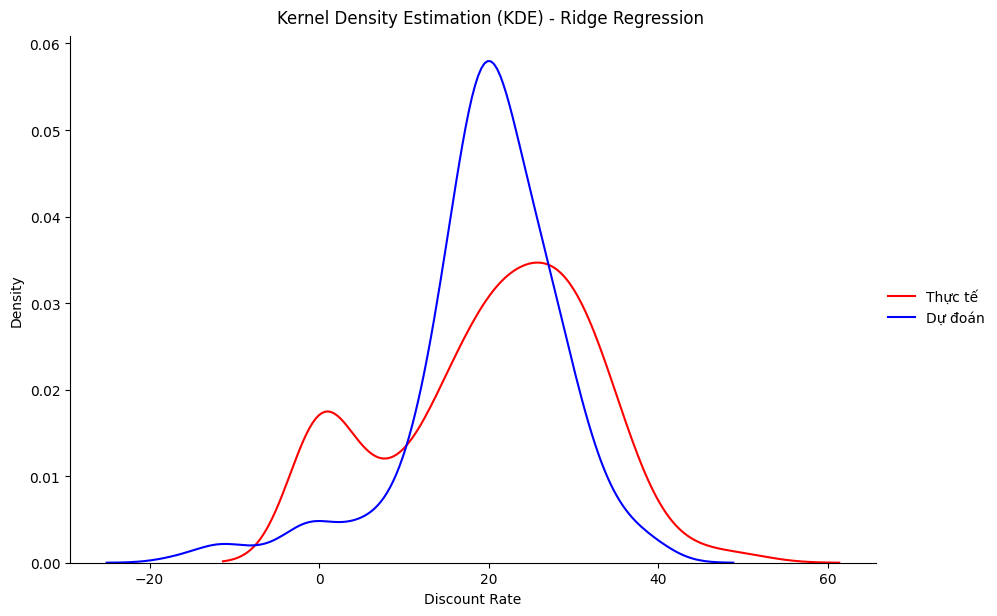

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Giá trị thực':y_test, 'Dự đoán': rr_pred}), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Giá trị thực', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Dự đoán', color='b', label='Dự đoán')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('Kernel Density Estimation (KDE) - Ridge Regression', y=1.02)

g.add_legend()
plt.show()


## 3. Lasso Regression

In [ ]:
# Tìm alpha tối ưu
alphas = np.logspace(-3, 3, 7)
lasso = Lasso()

# Thiết lập siêu tham số cần kiểm tra
param_grid = {'alpha': alphas}

# Sử dụng GridSearchCV để tìm giá trị alpha tốt nhất
grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

# Hiển thị giá trị alpha tốt nhất và kết quả
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print('Hệ số alpha tối ưu: ',best_alpha)
print('Kết quả tốt nhất: ',best_score)


Hệ số alpha tối ưu:  0.001
Kết quả tốt nhất:  0.579122532839765


In [ ]:
lar_pred_train=grid_search.predict(x_train)
lar_pred=grid_search.predict(x_test)

In [ ]:
lar_eval = evaluate_model(y_test, lar_pred)
print("Lasso Regression:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, lar_pred_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(lar_eval)

Lasso Regression:

Đánh giá trên tập train:
    MAE: 5.49
    MSE: 60.32
    RMSE: 7.77
    R-squared: 0.5916
    RMSLE: 0.56
    MAPE: inf%

Đánh giá trên tập test:
    MAE: 4.88
    MSE: 46.84
    RMSE: 6.84
    R-squared: 0.6585
    RMSLE: 0.52
    MAPE: inf%


C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))


In [ ]:
# Hiển thị các hệ số của các biến
lasso=Lasso(alpha=10)
lasso.fit(x_train,y_train)
feature_importance = pd.DataFrame({'Thuộc tính': X.columns, 'Hệ số': lasso.coef_})
print(feature_importance)
rfe = RFE(lasso, n_features_to_select=5)
fit_ = rfe.fit(x_train, y_train)
print("Top 5 hệ số ảnh hưởng lớn nhất:", X.columns[fit_.support_])

       Thuộc tính     Hệ số
0        Discount  0.000366
1           Store  0.019551
2          Rating  0.000000
3  Original Price -0.000071
4      Categories  0.011082
5   Quantity Sold  0.000124
6    Review Count  0.001250
7     Author Name -0.001132
Top 5 hệ số ảnh hưởng lớn nhất: Index(['Store', 'Categories', 'Quantity Sold', 'Review Count', 'Author Name'], dtype='object')


# 4. Polynomial Regression

## 4.1. Polynomial Regression

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Định nghĩa mô hình Polynomial Regression dưới dạng pipeline
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Thiết lập các tham số cần tìm kiếm
param_grid = {'polynomialfeatures__degree': np.arange(1, 7)}

# Sử dụng GridSearchCV để tìm độ cao tối ưu
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# In độ cao tối ưu và điểm số tương ứng
best_degree = grid_search.best_params_['polynomialfeatures__degree']
best_score = -grid_search.best_score_
print(f'Best Degree: {best_degree}')
print(f'Best Mean Squared Error on Training Set: {best_score}')



Best Degree: 1
Best Mean Squared Error on Training Set: 62.12522577036547


In [ ]:
poly_train=grid_search.predict(x_train)
poly_pred=grid_search.predict(x_test)

In [ ]:
poly_eval = evaluate_model(y_test, poly_pred)
print("Polynomial Linear Regression:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, poly_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(poly_eval)

Polynomial Linear Regression:

Đánh giá trên tập train:
    MAE: 5.49
    MSE: 60.32
    RMSE: 7.77
    R-squared: 0.5916
    RMSLE: 0.56
    MAPE: inf%

Đánh giá trên tập test:
    MAE: 4.88
    MSE: 46.84
    RMSE: 6.84
    R-squared: 0.6586
    RMSLE: 0.52
    MAPE: inf%


C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))


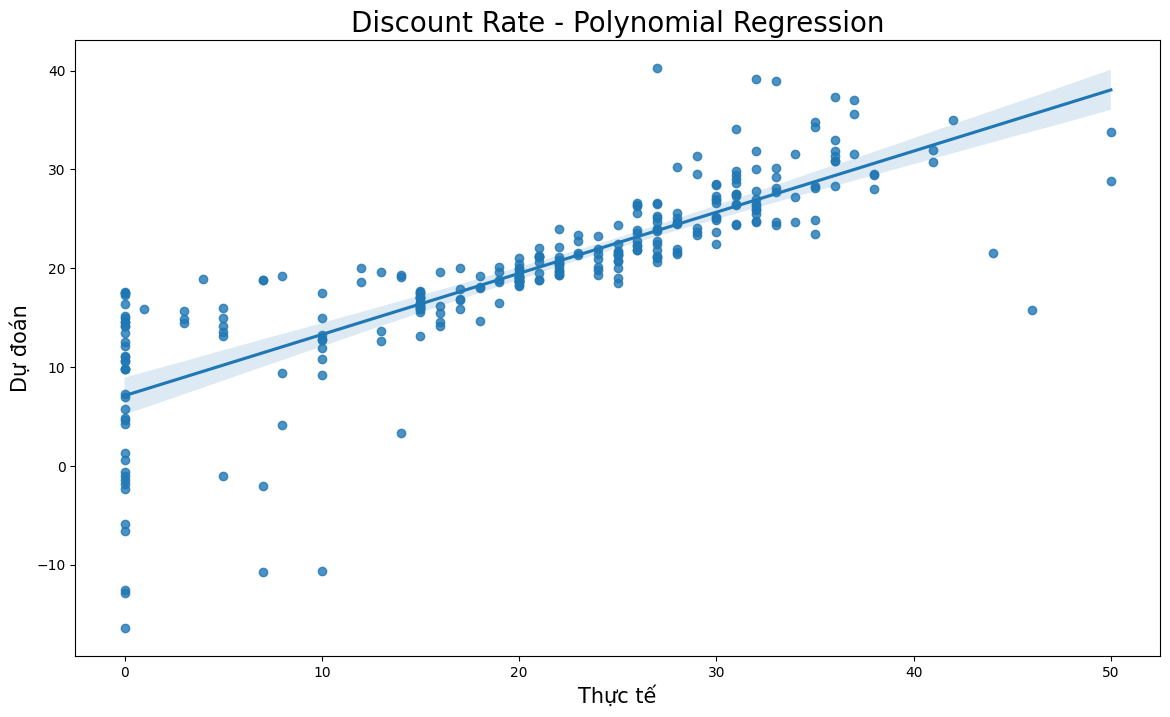

In [ ]:
out=pd.DataFrame({'Thực tế':y_test,'Dự đoán':poly_pred})
result=df1.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(14,8))
sns.regplot(x='Thực tế',y='Dự đoán',data=result)
plt.title('Discount Rate - Polynomial Regression',fontsize=20)
plt.xlabel('Thực tế',fontsize=15)
plt.ylabel('Dự đoán',fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({'Error values': (y_test - poly_pred)}).hvplot.kde()

:Distribution   [Error values]   (Density)

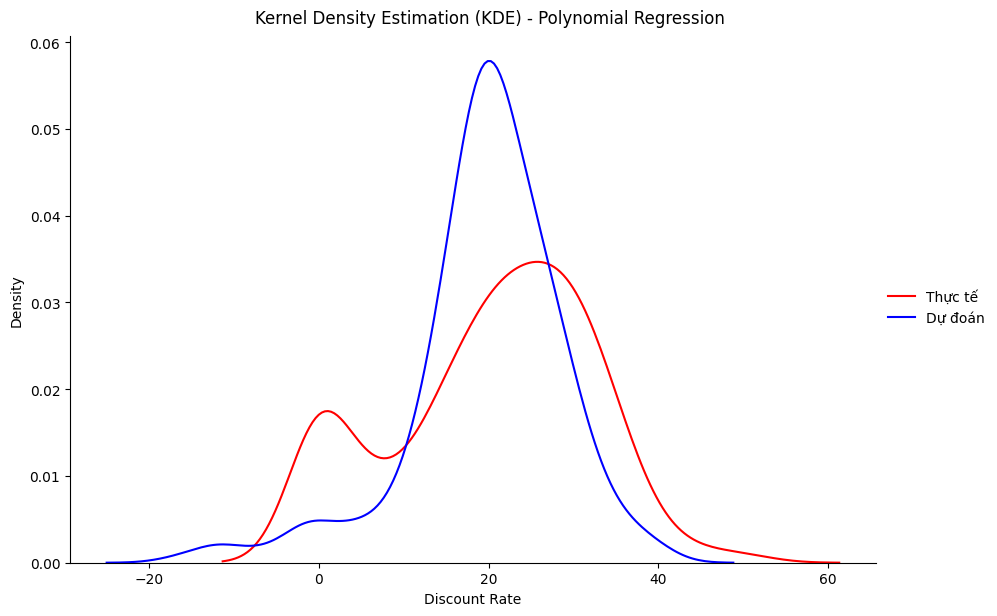

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Thực tế':y_test, 'Dự đoán': poly_pred}), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Thực tế', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Dự đoán', color='b', label='Dự đoán')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('Kernel Density Estimation (KDE) - Polynomial Regression', y=1.02)

g.add_legend()
plt.show()


## 4.2. Polynomial Ridge Regression

In [ ]:

model = make_pipeline(PolynomialFeatures(), Ridge())

# Thiết lập các tham số cần tìm kiếm
param_grid = {'polynomialfeatures__degree': np.arange(1, 7)}

# Sử dụng GridSearchCV để tìm độ cao tối ưu
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# In độ cao tối ưu và điểm số tương ứng
best_degree = grid_search.best_params_['polynomialfeatures__degree']
best_score = -grid_search.best_score_
print(f'Best Degree: {best_degree}')
print(f'Best Mean Squared Error on Training Set: {best_score}')



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.59872e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.3812e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.599e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.4606e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a

Best Degree: 2
Best Mean Squared Error on Training Set: 40.737013912945756


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.28435e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
poly_rr_train = grid_search.predict(x_train)
poly_rr_pred = grid_search.predict(x_test)

In [ ]:
poly_rr_eval = evaluate_model(y_test, poly_rr_pred)
print("Polynomial Ridge Regression:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, poly_rr_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(poly_rr_eval)


Polynomial Ridge Regression:

Đánh giá trên tập train:
    MAE: 3.76
    MSE: 30.73
    RMSE: 5.54
    R-squared: 0.7920
    RMSLE: 0.47
    MAPE: inf%

Đánh giá trên tập test:
    MAE: 3.52
    MSE: 28.24
    RMSE: 5.31
    R-squared: 0.7941
    RMSLE: 0.46
    MAPE: inf%


C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))


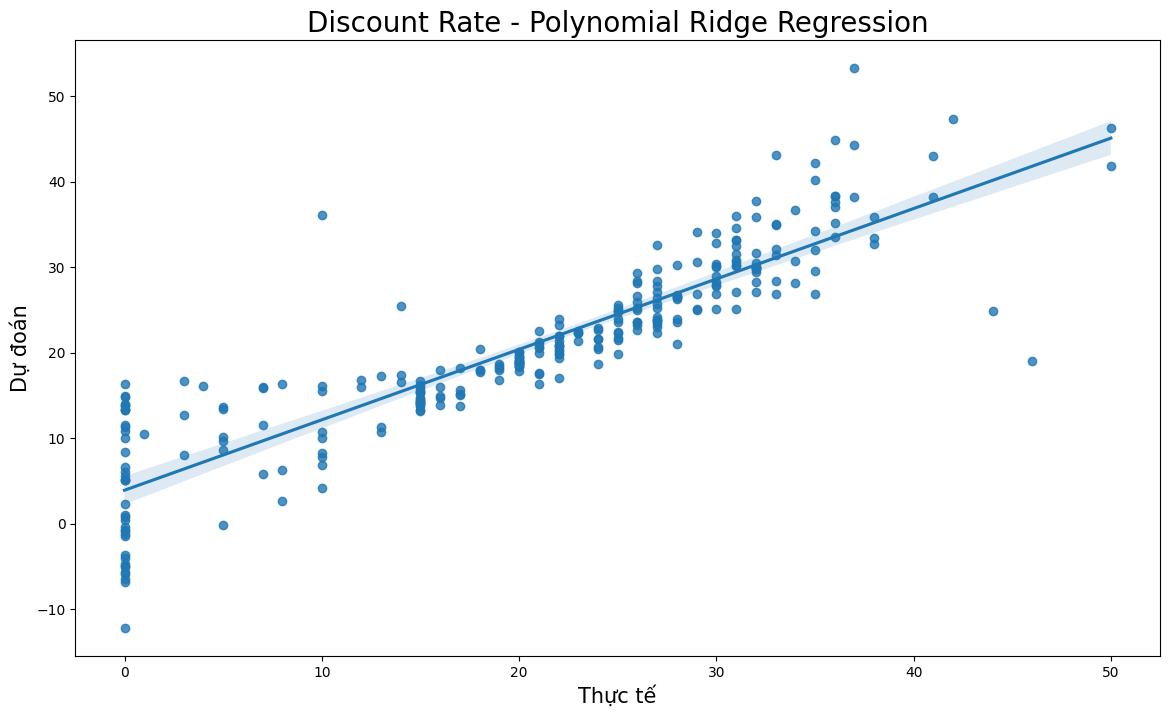

In [ ]:
out=pd.DataFrame({'Thực tế':y_test,'Dự đoán':poly_rr_pred})
result=df1.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(14,8))
sns.regplot(x='Thực tế',y='Dự đoán',data=result)
plt.title('Discount Rate - Polynomial Ridge Regression',fontsize=20)
plt.xlabel('Thực tế',fontsize=15)
plt.ylabel('Dự đoán',fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({'Error values': (y_test - poly_rr_pred)}).hvplot.kde()

:Distribution   [Error values]   (Density)

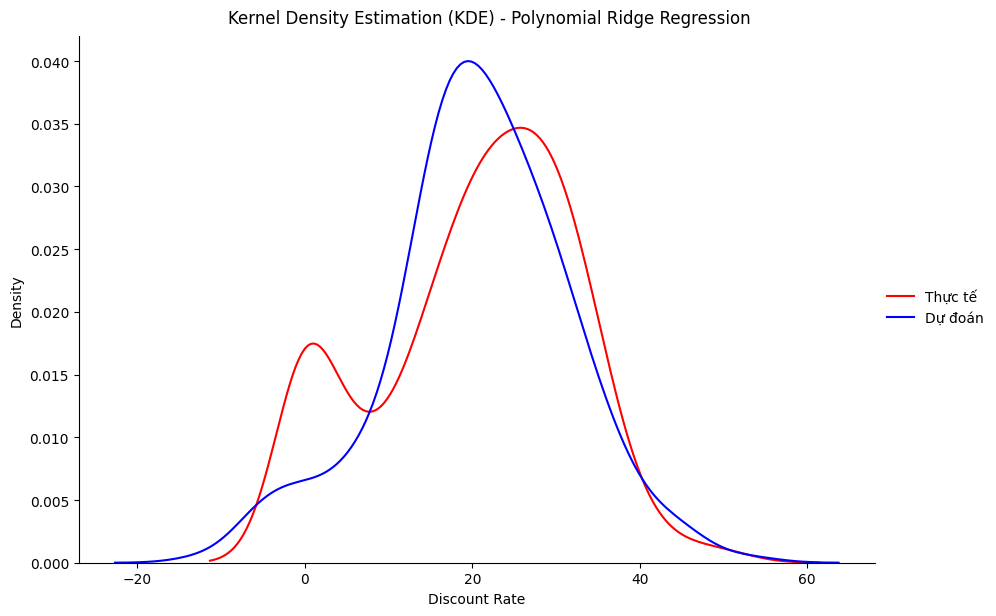

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Giá trị thực':y_test, 'Dự đoán': poly_rr_pred}), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Giá trị thực', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Dự đoán', color='b', label='Dự đoán')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('Kernel Density Estimation (KDE) - Polynomial Ridge Regression', y=1.02)

g.add_legend()
plt.show()


## 4.3. Polynomial Lasso Regression

In [ ]:

model = make_pipeline(PolynomialFeatures(), Lasso())

# Thiết lập các tham số cần tìm kiếm
param_grid = {'polynomialfeatures__degree': np.arange(1, 7)}

# Sử dụng GridSearchCV để tìm độ cao tối ưu
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# In độ cao tối ưu và điểm số tương ứng
best_degree = grid_search.best_params_['polynomialfeatures__degree']
best_score = -grid_search.best_score_
print(f'Best Degree: {best_degree}')
print(f'Best Mean Squared Error on Training Set: {best_score}')



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.047e+04, tolerance: 1.936e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e+04, tolerance: 1.889e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

Best Degree: 2
Best Mean Squared Error on Training Set: 42.53852010741523


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.647e+03, tolerance: 1.958e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.511e+04, tolerance: 2.405e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
poly_lar_train=grid_search.predict(x_train)
poly_lar_pred=grid_search.predict(x_test)

In [ ]:
poly_lar_eval = evaluate_model(y_test, poly_lar_pred)
print("Polynomial Lasso Regression:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, poly_lar_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(poly_lar_eval)


Polynomial Lasso Regression:

Đánh giá trên tập train:
    MAE: 3.75
    MSE: 30.80
    RMSE: 5.55
    R-squared: 0.7915
    RMSLE: 0.47
    MAPE: inf%

Đánh giá trên tập test:
    MAE: 3.53
    MSE: 28.56
    RMSE: 5.34
    R-squared: 0.7918
    RMSLE: 0.45
    MAPE: inf%


C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
C:\Users\PC\AppData\Local\Temp\ipykernel_15984\688660295.py:6: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))


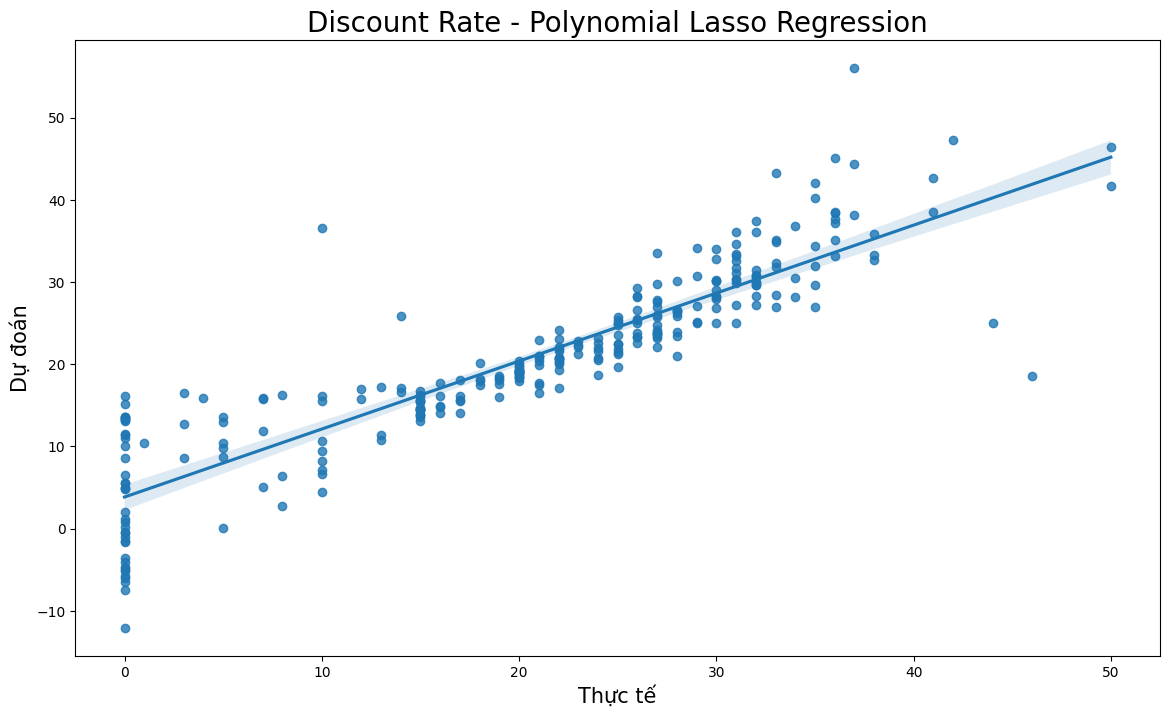

In [ ]:
out=pd.DataFrame({'Thực tế':y_test,'Dự đoán':poly_lar_pred})
result=df1.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(14,8))
sns.regplot(x='Thực tế',y='Dự đoán',data=result)
plt.title('Discount Rate - Polynomial Lasso Regression',fontsize=20)
plt.xlabel('Thực tế',fontsize=15)
plt.ylabel('Dự đoán',fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({'Error values': (y_test - poly_lar_pred)}).hvplot.kde()

:Distribution   [Error values]   (Density)

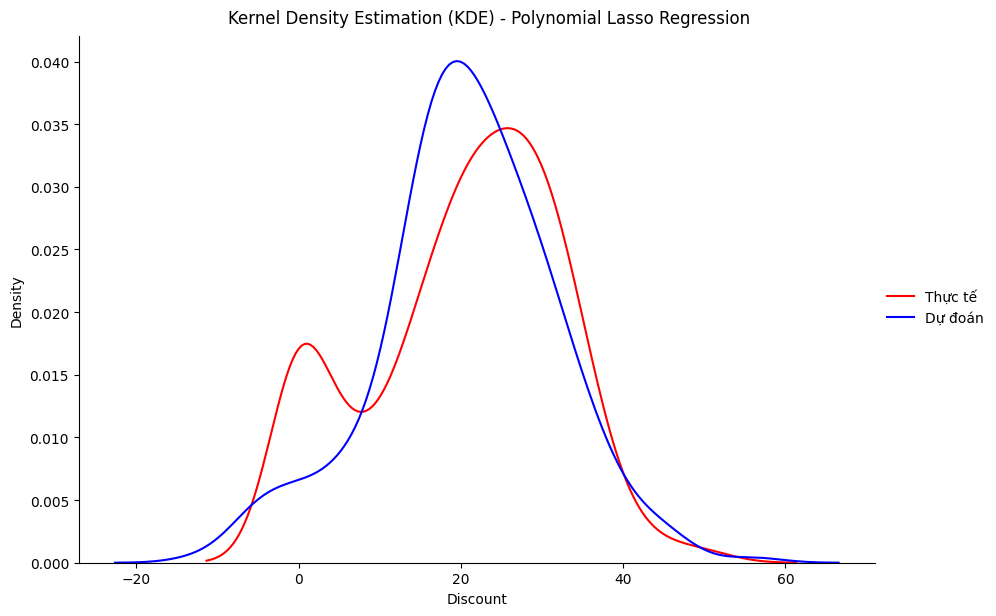

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Giá trị thực':y_test, 'Dự đoán': poly_lar_pred}), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Giá trị thực', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Dự đoán', color='b', label='Dự đoán')
g.set_axis_labels('Discount', 'Density')
g.fig.suptitle('Kernel Density Estimation (KDE) - Polynomial Lasso Regression', y=1.02)

g.add_legend()
plt.show()


### So sánh giữa 3 mô hình Polynomial Regression

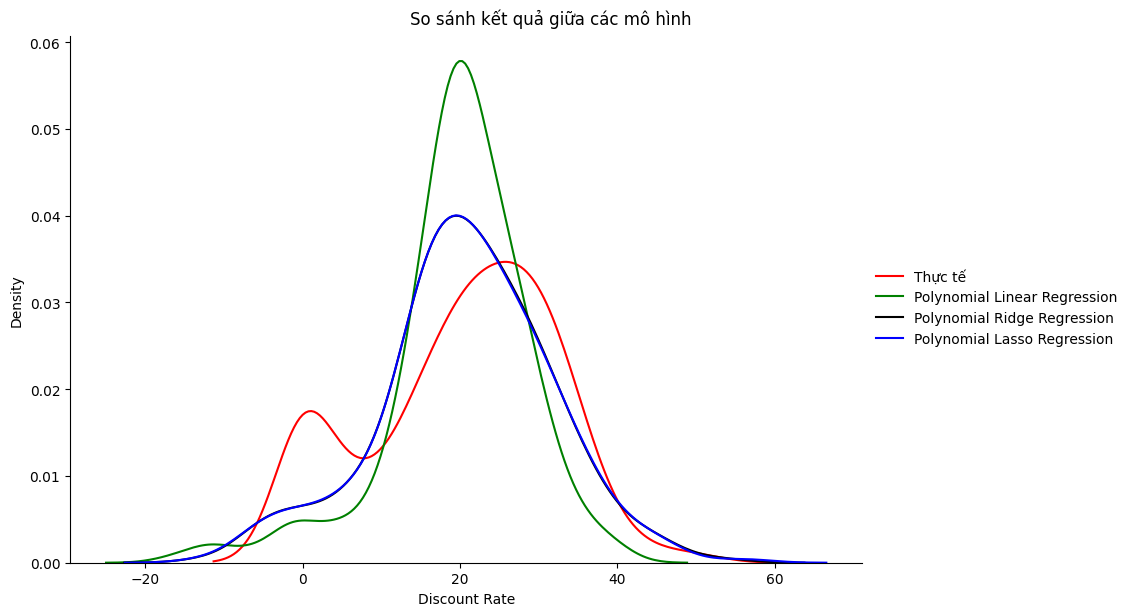

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Giá trị thực':y_test,'Linear':poly_pred,  'Rigde': poly_rr_pred,'Lasso': poly_lar_pred }), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Giá trị thực', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Linear', color='g', label='Polynomial Linear Regression')
g.map(sns.kdeplot, 'Rigde', color='black', label='Polynomial Ridge Regression')
g.map(sns.kdeplot, 'Lasso', color='b', label='Polynomial Lasso Regression')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('So sánh kết quả giữa các mô hình', y=1.02)

g.add_legend()
plt.show()


## 5. KNeighborsRegressor

In [ ]:
X=df1[['Discount', 'Store', 'Rating', 'Original Price', 'Categories', 'Quantity Sold', 'Review Count', 'Author Name']]
y=df1['Discount Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_model = KNeighborsRegressor()

In [ ]:
grid_search = GridSearchCV(knn_model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
print("Tham số tốt nhất: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Tham số tốt nhất:  {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.95


In [ ]:
knn_pred_train=grid_search.predict(x_train)
knn_pred=grid_search.predict(x_test)

In [ ]:
knn_eval = evaluate_model(y_test, knn_pred)
print("KNeighbors Regression:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, knn_pred_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(knn_eval)

KNeighbors Regression:

Đánh giá trên tập train:
    MAE: 0.00
    MSE: 0.00
    RMSE: 0.00
    R-squared: 1.0000
    RMSLE: 0.00
    MAPE: 0.00%

Đánh giá trên tập test:
    MAE: 0.64
    MSE: 1.42
    RMSE: 1.19
    R-squared: 0.9896
    RMSLE: 0.13
    MAPE: inf%


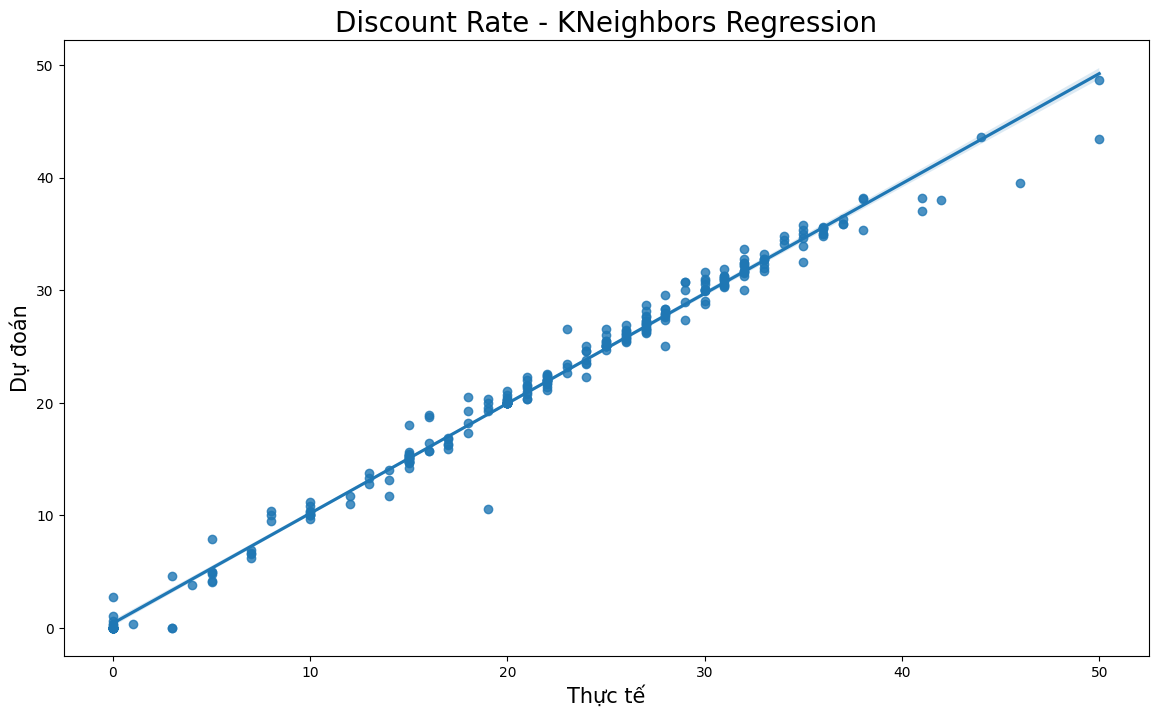

In [ ]:
out=pd.DataFrame({'Thực tế':y_test,'Dự đoán':knn_pred})
result=df.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(14,8))
sns.regplot(x='Thực tế',y='Dự đoán',data=result)
plt.title('Discount Rate - KNeighbors Regression',fontsize=20)
plt.xlabel('Thực tế',fontsize=15)
plt.ylabel('Dự đoán',fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({'Error values': (y_test - knn_pred)}).hvplot.kde()

:Distribution   [Error values]   (Density)

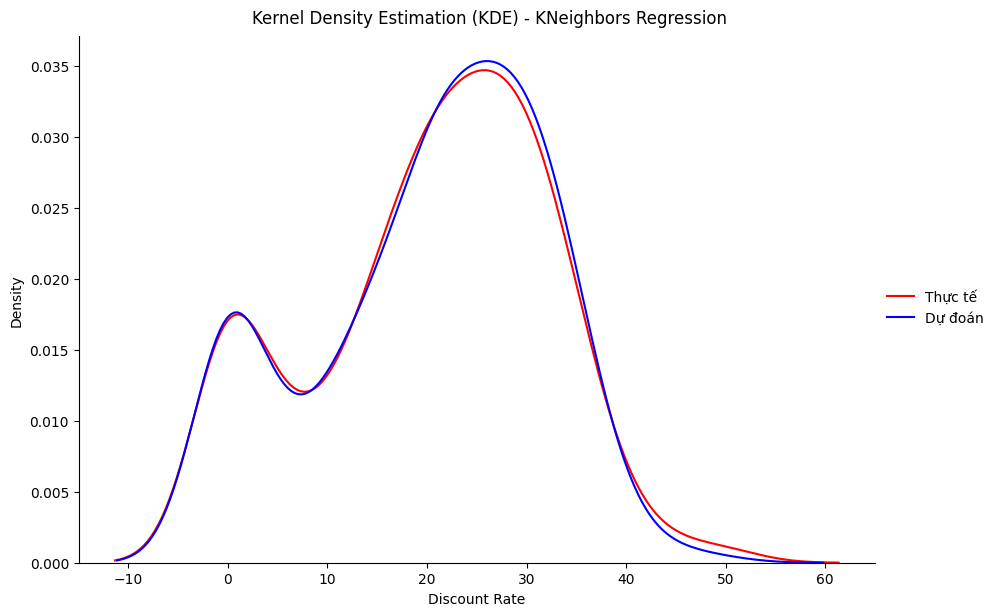

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Giá trị thực':y_test, 'Dự đoán': knn_pred}), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Giá trị thực', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Dự đoán', color='b', label='Dự đoán')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('Kernel Density Estimation (KDE) - KNeighbors Regression', y=1.02)

g.add_legend()
plt.show()


## 6. Random Forest Regression

In [ ]:
X=df1[['Discount', 'Store', 'Rating', 'Original Price', 'Categories', 'Quantity Sold', 'Review Count', 'Author Name']]
y=df1['Discount Rate']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
rf_model = RandomForestRegressor()

# Tìm hệ số tối ưu
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(rf_model, param_grid, scoring='r2', cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [ ]:
best_params = grid_search.best_params_
print('Các giá trị tốt nhất của các tham số: ',best_params)

Các giá trị tốt nhất của các tham số:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
rf_pred_train=grid_search.predict(x_train)
rf_pred=grid_search.predict(x_test)

In [ ]:
# Kết quả trên tập test
rf_eval = evaluate_model(y_test, rf_pred)
print("RandomForestRegressor:\n")
print('Đánh giá trên tập train:')
print_score(evaluate_model(y_train, rf_pred_train))
print('====================================\n')
print('Đánh giá trên tập test:')
print_score(knn_eval)

RandomForestRegressor:

Đánh giá trên tập train:
    MAE: 0.35
    MSE: 0.60
    RMSE: 0.77
    R-squared: 0.9959
    RMSLE: 0.04
    MAPE: 2.30%

Đánh giá trên tập test:
    MAE: 0.64
    MSE: 1.42
    RMSE: 1.19
    R-squared: 0.9896
    RMSLE: 0.13
    MAPE: inf%


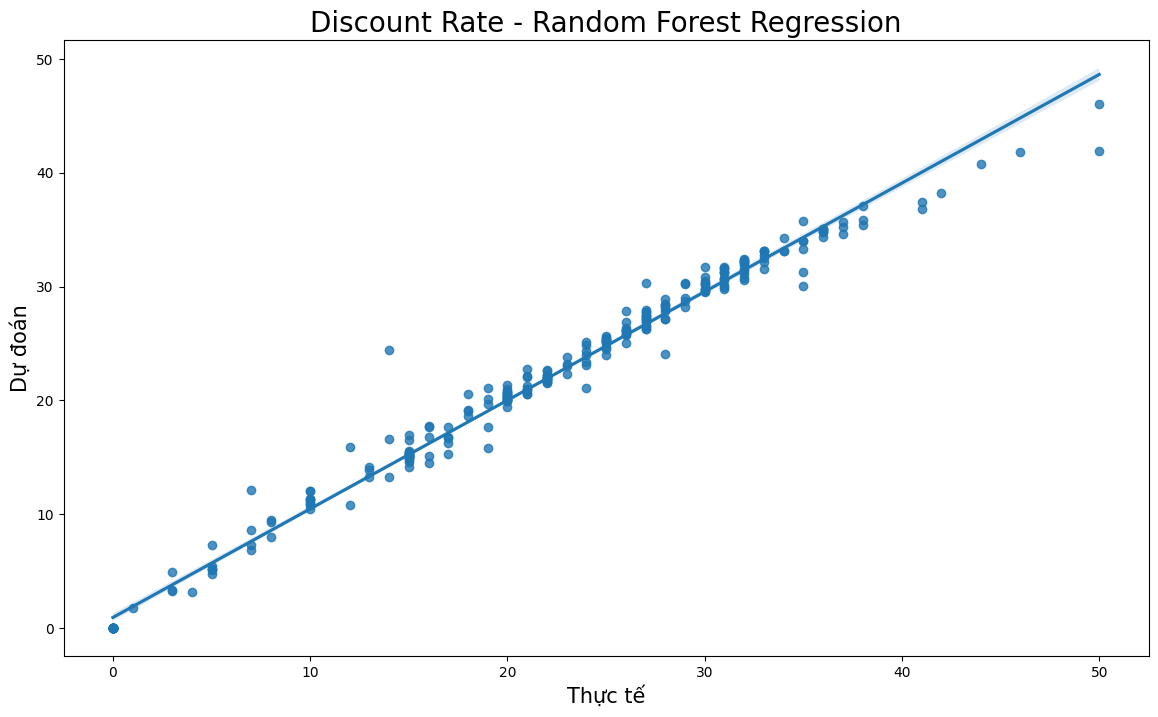

In [ ]:
out=pd.DataFrame({'Thực tế':y_test,'Dự đoán':rf_pred})
result=df.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(14,8))
sns.regplot(x='Thực tế',y='Dự đoán',data=result)
plt.title('Discount Rate - Random Forest Regression',fontsize=20)
plt.xlabel('Thực tế',fontsize=15)
plt.ylabel('Dự đoán',fontsize=15)
plt.show()

In [ ]:
pd.DataFrame({'Error Values': (y_test - rf_pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

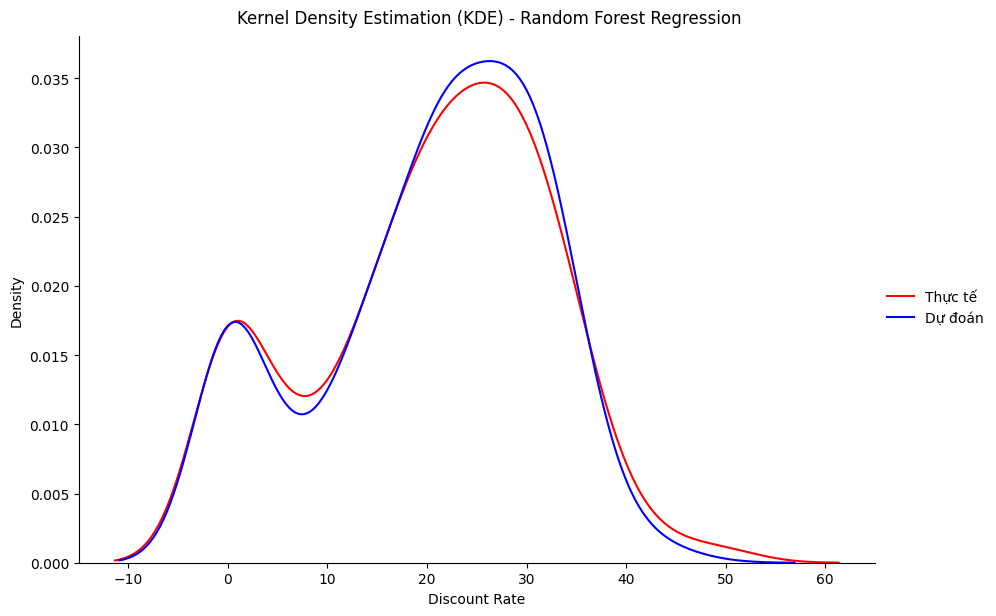

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(pd.DataFrame({'Giá trị thực':y_test, 'Dự đoán': rf_pred}), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Giá trị thực', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Dự đoán', color='b', label='Dự đoán')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('Kernel Density Estimation (KDE) - Random Forest Regression', y=1.02)

g.add_legend()
plt.show()


## So sánh kết quả giữa các mô hình

In [ ]:
col=['MAE','MSE','RMSE','R-squared','RMSLE','MAPE']

In [ ]:
lr_score = pd.DataFrame(data = [lr_eval], columns=col)
lr_score.insert(0, 'Model', 'Linear Regression')
rr_score = pd.DataFrame(data = [rr_eval], columns=col)
rr_score.insert(0, 'Model', 'Ridge Regression')
lar_score = pd.DataFrame(data = [lar_eval], columns=col)
lar_score.insert(0, 'Model', 'Lasso Regression')
poly_lr_score = pd.DataFrame(data = [poly_eval], columns=col)
poly_lr_score.insert(0, 'Model', 'Polynomial Linear Regression')
poly_rr_score = pd.DataFrame(data = [poly_rr_eval], columns=col)
poly_rr_score.insert(0, 'Model', 'Polynomial Ridge Regression')
poly_lar_score = pd.DataFrame(data = [poly_lar_eval], columns=col)
poly_lar_score.insert(0, 'Model', 'Polynomial Lasso Regression')
knn_score = pd.DataFrame(data = [knn_eval], columns=col)
knn_score.insert(0, 'Model', 'KNeighbors Regression')
rf_score = pd.DataFrame(data = [rf_eval], columns=col)
rf_score.insert(0, 'Model', 'Random Forest Regression')


In [ ]:
predictions = pd.concat([lr_score, rr_score, lar_score, poly_lr_score, poly_rr_score, poly_lar_score, knn_score, rf_score],ignore_index=True ,sort=False)
predictions

,Model,MAE,MSE,RMSE,R-squared,RMSLE,MAPE
0,Linear Regression,4.859774,46.728593,6.835832,0.659353,0.517158,inf
1,Ridge Regression,4.887458,47.011502,6.856493,0.657291,0.517733,inf
2,Lasso Regression,4.879250,46.839173,6.843915,0.658547,0.516158,inf
3,Polynomial Linear Regression,4.879215,46.838338,6.843854,0.658553,0.516149,inf
4,Polynomial Ridge Regression,3.520319,28.244599,5.314565,0.794100,0.462696,inf
5,Polynomial Lasso Regression,3.533412,28.561809,5.344325,0.791787,0.451345,inf
6,KNeighbors Regression,0.641948,1.421000,1.192057,0.989641,0.133847,inf
7,Random Forest Regression,0.787144,1.963609,1.401288,0.985685,0.074043,5.302591


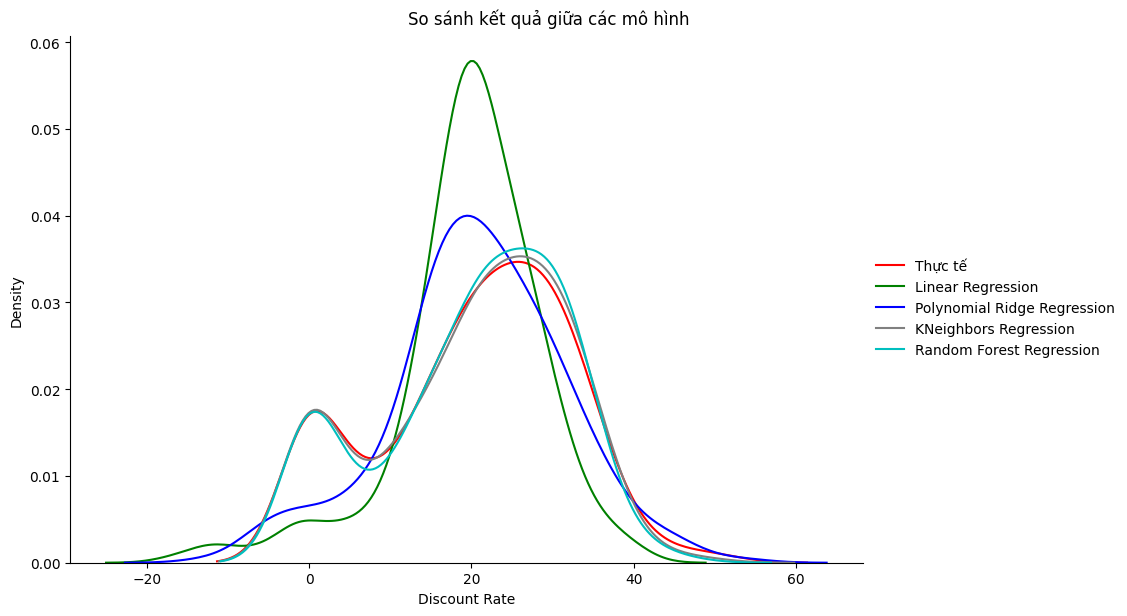

In [ ]:
g = sns.FacetGrid(pd.DataFrame({'Giá trị thực':y_test,'Linear':poly_pred,  'Rigde': poly_rr_pred,'knn': knn_pred, 'rf': rf_pred }), height=6, aspect=1.5)

g.map(sns.kdeplot, 'Giá trị thực', color='r', label='Thực tế')
g.map(sns.kdeplot, 'Linear', color='g', label='Linear Regression')
g.map(sns.kdeplot, 'Rigde', color='b', label='Polynomial Ridge Regression')
g.map(sns.kdeplot, 'knn', color='gray', label='KNeighbors Regression')
g.map(sns.kdeplot, 'rf', color='c', label='Random Forest Regression')
g.set_axis_labels('Discount Rate', 'Density')
g.fig.suptitle('So sánh kết quả giữa các mô hình', y=1.02)

g.add_legend()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_15984\3452647812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  splot = sns.barplot(x =predictions['R-squared'] ,y = predictions['Model'],palette=custom_color)
C:\Users\PC\AppData\Local\Temp\ipykernel_15984\3452647812.py:4: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  splot = sns.barplot(x =predictions['R-squared'] ,y = predictions['Model'],palette=custom_color)


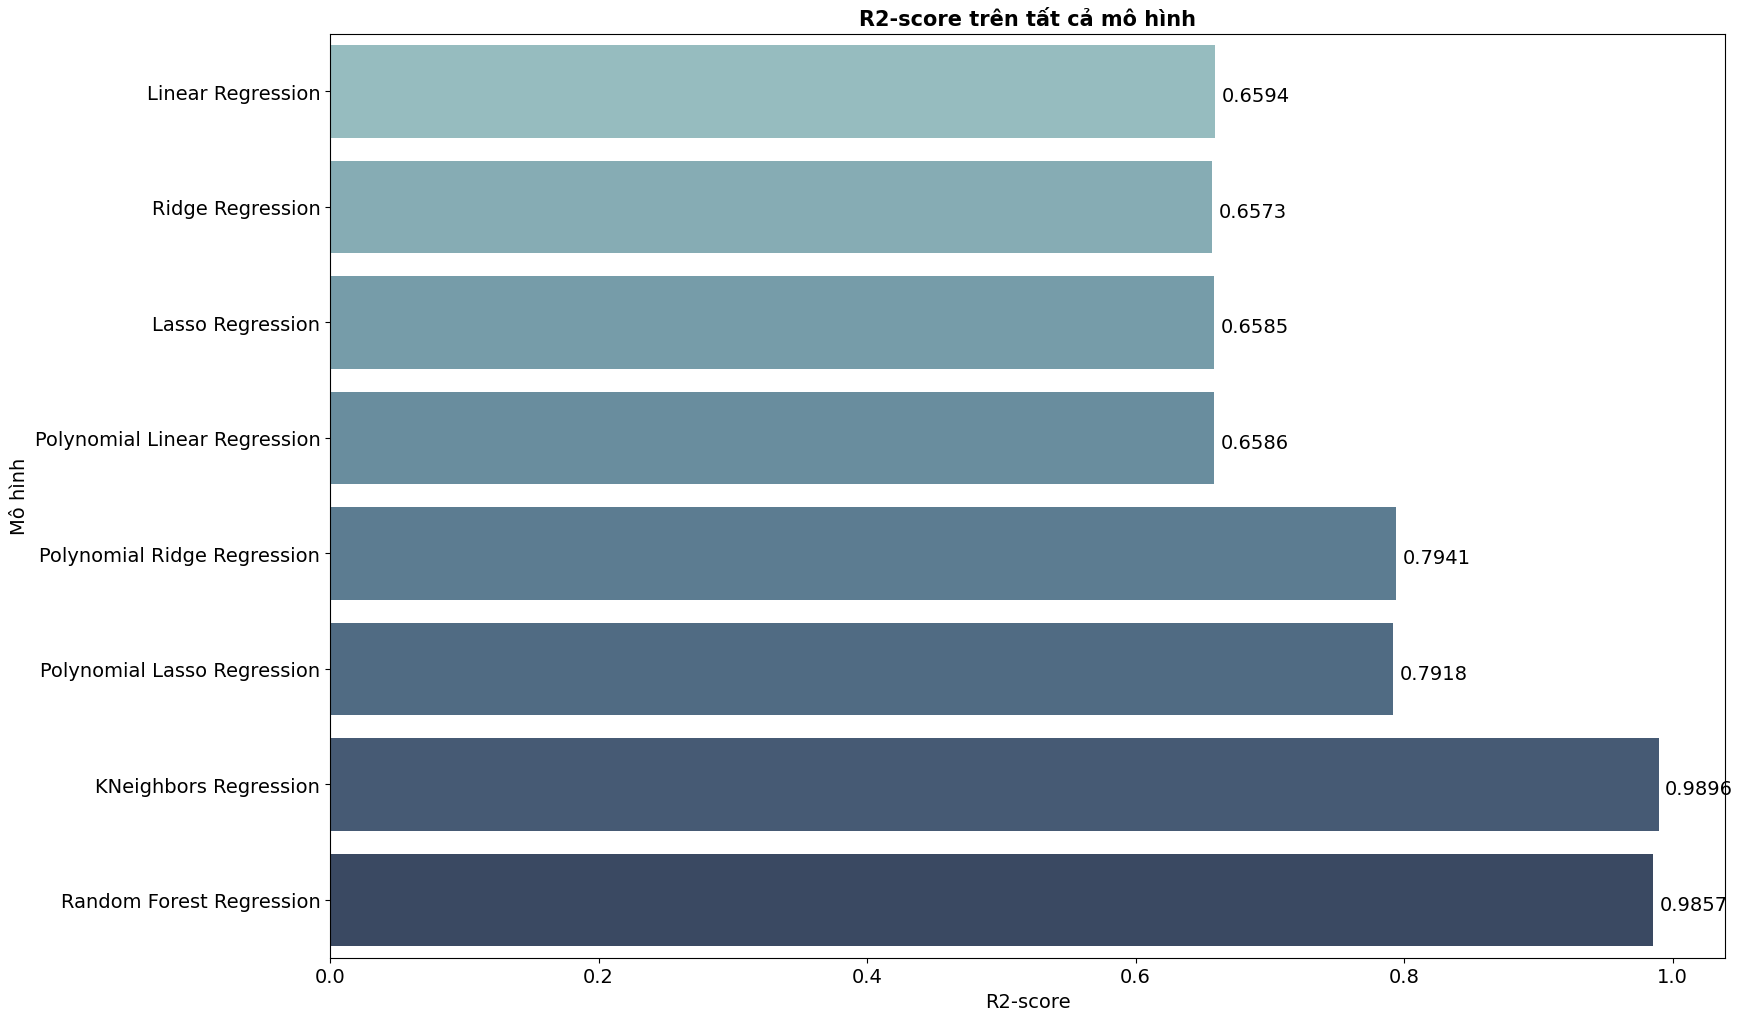

In [ ]:
custom_color =sns.cubehelix_palette(10, rot=-.25, light=.7)

plt.figure(figsize=(18,12))
splot = sns.barplot(x =predictions['R-squared'] ,y = predictions['Model'],palette=custom_color)
#Decorating the plot
plt.title('R2-score trên tất cả mô hình',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('R2-score',fontsize=14)
plt.ylabel('Mô hình',fontsize=14)

for p in splot.patches:
    width = p.get_width()
    plt.text(0.03+p.get_width(), p.get_y()+0.55*p.get_height(),
             f'{width:.4f}',
             ha='center', va='center',fontsize=14)

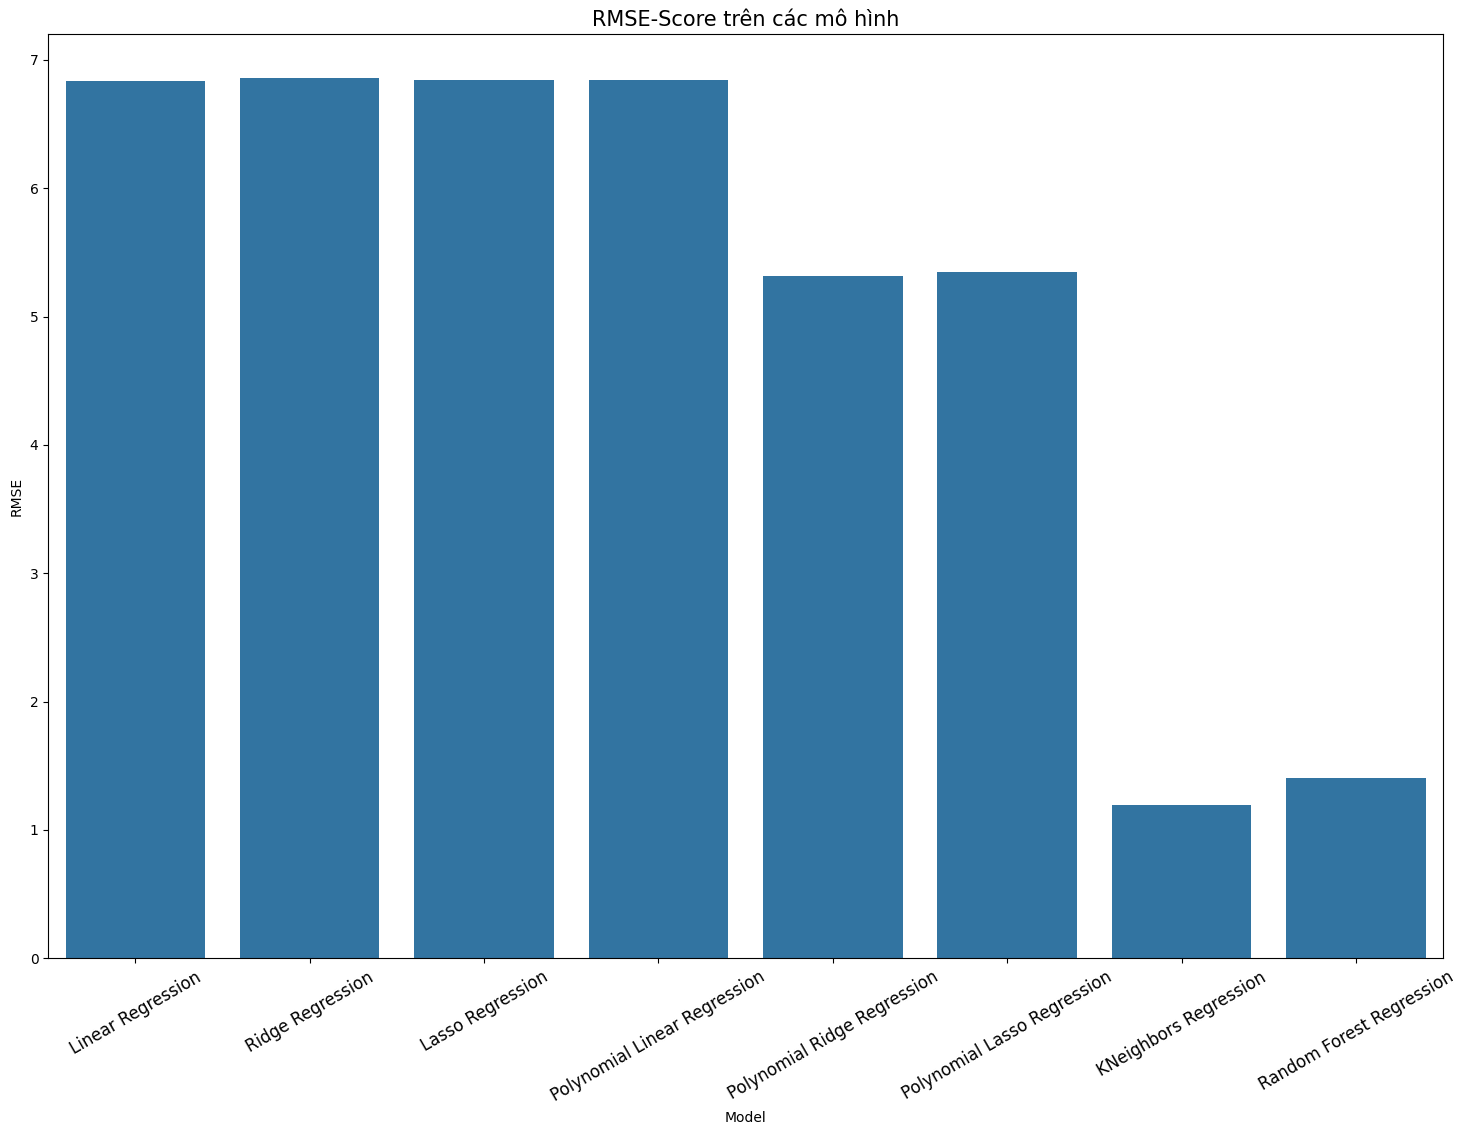

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x=predictions['Model'], y=predictions['RMSE'])
plt.title("RMSE-Score trên các mô hình", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

